<a href="https://colab.research.google.com/github/priyabodke41/Hotel-booking-analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEAM STATEMENT**

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [13]:
#importing necessery libraries for future analysis of the dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [14]:
plt.style.use('seaborn')
plt.rcParams['axes.titlesize']=25
plt.rcParams['axes.titleweight']='bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['axes.labelsize']=20
plt.rcParams['font.weight']='bold'
plt.rcParams['legend.fontsize']=15
plt.rcParams['legend.title_fontsize']=15


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
hoteldf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/capston project/Hotel Bookings (2).csv")
hoteldf  

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


**DATA COLLECTION AND UNDERSTANDING**

In [18]:
#lets find 1st 5 rows
hoteldf.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [19]:
#lets check last 5 rows
hoteldf.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [20]:
#using info function lets check datatype & dataname
hoteldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [21]:
#lets check the number of rows and coloumns of given dataset to understand the size we are working on
hoteldf.shape

(119390, 32)

In [22]:
#lets find descriptive statistics summary of a given dataframe
hoteldf.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [23]:
#checking type of every column in the dataset
hoteldf.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

**DATA CLEANING AND MANUPULATION**

In [24]:
# lets check for the duplicate rows
hoteldf.duplicated().value_counts()    

False    87396
True     31994
dtype: int64

In [25]:
#true means duplicate rows are present so lets drop the duplicate rows
hoteldf= hoteldf.drop_duplicates()
hoteldf.shape

(87396, 32)

We have alredy seen some Nan values,Which will require cleaning and handling of those Nan values.




In [26]:
#Lets check which columns have Nan values using isnull() function,
#sum() function will show us how many null values are found in each coloumn.
hoteldf.isnull().sum()


hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [27]:
#we have found Nan values in 'childrean','contry','agent','company' coloumns
#looking into the nature of our dataset coloumn 'company' is insignificant to our data analysis.
#Droping coloumns that are not significant
hoteldf.drop('company', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
hoteldf.T

,0,1,2,3,4,6,7,8,9,10,...,119380,119381,119382,119383,119384,119385,119386,119387,119388,119389
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,...,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
lead_time,342,737,7,13,14,0,9,85,75,23,...,44,188,135,164,21,23,102,34,109,205
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
arrival_date_month,July,July,July,July,July,July,July,July,July,July,...,August,August,August,August,August,August,August,August,August,August
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27,...,35,35,35,35,35,35,35,35,35,35
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1,...,31,31,30,31,30,30,31,31,31,29
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,2
stays_in_week_nights,0,0,1,1,2,2,2,3,3,4,...,3,3,4,4,5,5,5,5,5,7
adults,2,2,1,1,2,2,2,2,2,2,...,2,2,3,2,2,2,3,2,2,2


In [29]:
#Replacing all Nan values in 'childrean' and 'agent' with 0
hoteldf[['children']]=hoteldf[['children']].fillna(0)
hoteldf[['agent']]=hoteldf[['agent']].fillna(0)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [30]:
#Replacing all Nan values in 'country' with 'others'
hoteldf[['country']]=hoteldf[['country']].fillna('other')

In [31]:
hoteldf.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

**EDA(Exponential data analysis)**

**1.Which type of hotel mostly preffered by the guests?**

In [32]:
hoteldf.hotel.value_counts()

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of guests')

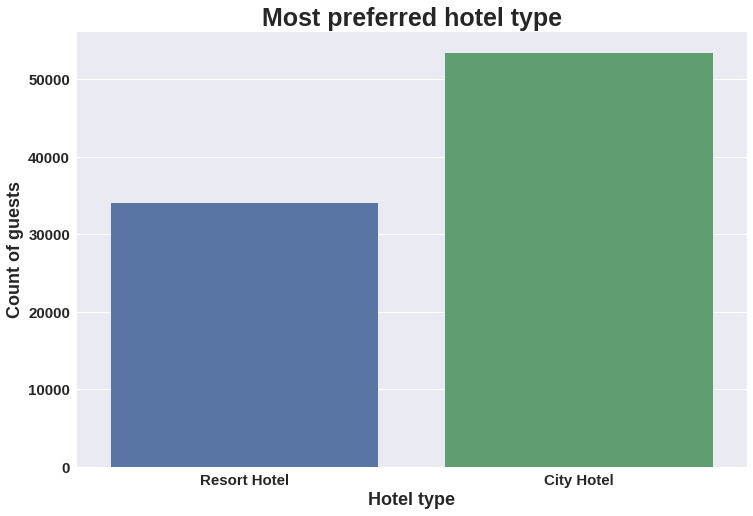

In [33]:
plt.figure(figsize=(12,8))
hoteltype=sns.countplot(hoteldf.hotel)
hoteltype.set_title('Most preferred hotel type',fontsize=25)
hoteltype.set_xlabel('Hotel type',fontsize=18)
hoteltype.set_ylabel('Count of guests',fontsize=18)



**Conclusion** : Most number of guests preffered city hotel.

**2.which months has the most bookings?**

In [34]:
hoteldf.arrival_date_month.value_counts()

August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: arrival_date_month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of guests')

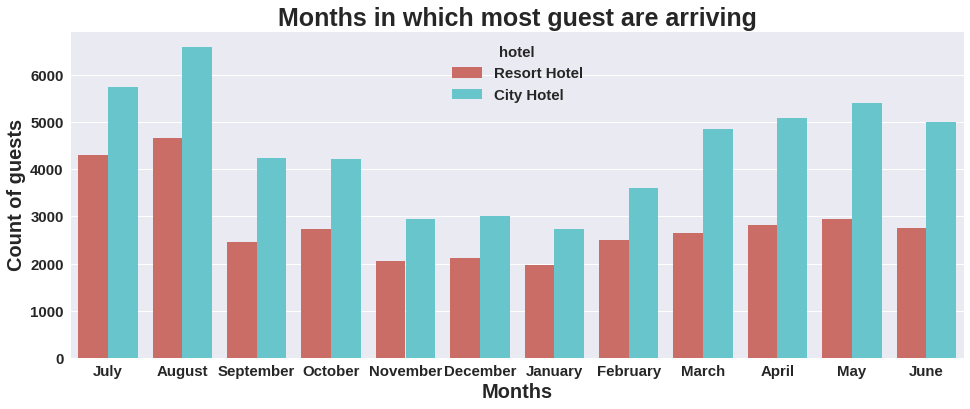

In [35]:
plt.figure(figsize=(16,6))
sns.countplot(hoteldf.arrival_date_month,hue=hoteldf.hotel, palette='hls')
plt.title('Months in which most guest are arriving')
plt.xlabel('Months')
plt.ylabel('Count of guests')


**Conclusion** : The hotel reservation tends to peak during July and August.



**3.Which year has the highest bookings?**

In [36]:
hoteldf.arrival_date_year.value_counts()

2016    42391
2017    31692
2015    13313
Name: arrival_date_year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of guests')

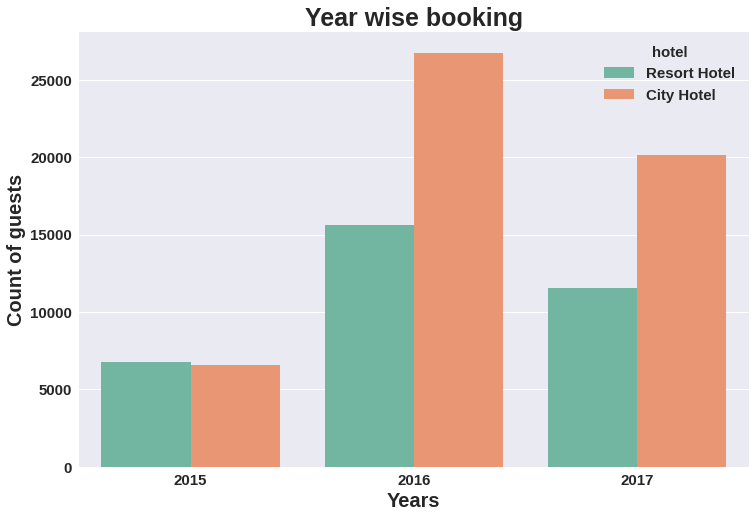

In [37]:

plt.figure(figsize=(12,8))
sns.countplot(hoteldf.arrival_date_year,hue=hoteldf.hotel,palette='Set2')
plt.title('Year wise booking')
plt.xlabel('Years')
plt.ylabel('Count of guests')


**Conclusion:** Year 2016 has the highest bookings in Resort hotel as well as City hotel and very less in 2015.

**4.From which country most guest are coming?**

In [38]:
hoteldf.country.value_counts()[:10]


PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
Name: country, dtype: int64

In [39]:
country_new=hoteldf.country.value_counts()[:10].reset_index().rename(columns={'index':'country','country':'total guest'})
country_new

,country,total guest
0,PRT,27453
1,GBR,10433
2,FRA,8837
3,ESP,7252
4,DEU,5387
5,ITA,3066
6,IRL,3016
7,BEL,2081
8,BRA,1995
9,NLD,1911


Text(0.5, 1.0, 'Total number of guest from different countries ')

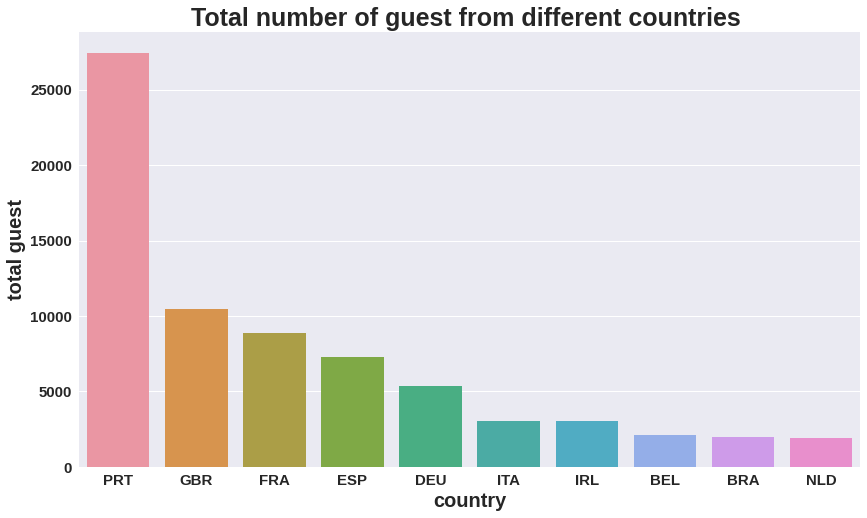

In [40]:
plt.figure(figsize=(14,8))
sns.barplot(x=country_new['country'],y=country_new['total guest'])
plt.title('Total number of guest from different countries ')


**conclusion:** Most of the guests are coming from portugal followed by GBR and FRA

**5.What are the percentage of repeated guests?**

In [41]:
hoteldf.distribution_channel.value_counts()

TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

Text(0.5, 1.0, ' Percentgae (%) of repeated guests')

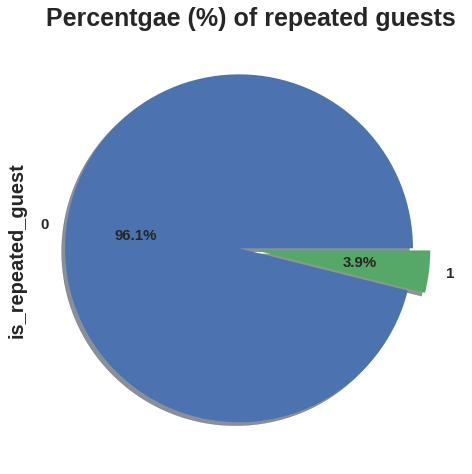

In [42]:
hoteldf['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(10,8),fontsize=15)

plt.title(" Percentgae (%) of repeated guests")

**Conclusion:** Very few guest are repeated(3.9%) remaining 96.1% were new guests.




**6.How many guests required parking space?**



Text(0.5, 1.0, ' Percentge (%) of car parking requirement ')

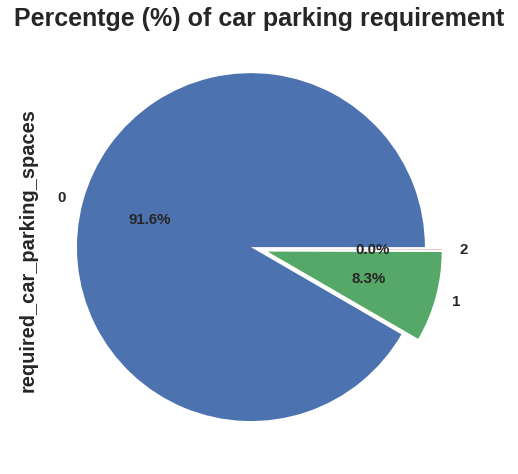

In [43]:
plt.figure(figsize=(10,8))
hoteldf.required_car_parking_spaces.value_counts()[:3].plot.pie(explode=([0.05]*3),autopct='%1.1f%%',fontsize=15)
plt.title(" Percentge (%) of car parking requirement ")

Most of the customer do not required parking space only 8.3% requires 1 parking space

**7.Hotel type and Cancellation rate**

In [44]:
highest_cancel_booking=hoteldf[hoteldf['is_canceled']==1].groupby('hotel').size().reset_index().rename(columns={0:'total_canceled_bookings'})
highest_cancel_booking

,hotel,total_canceled_bookings
0,City Hotel,16049
1,Resort Hotel,7976


Text(0.5, 1.0, 'Booking cancellation')

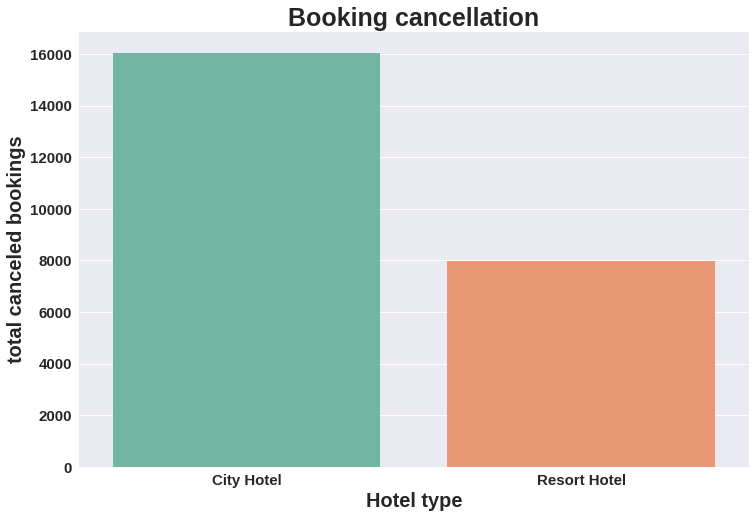

In [45]:
plt.figure(figsize=(12,8))
sns.barplot(x='hotel',y='total_canceled_bookings',data=highest_cancel_booking,palette='Set2')
plt.xlabel('Hotel type')
plt.ylabel('total canceled bookings')
plt.title('Booking cancellation')

**Conclusion:** City hotel has the high booking cancellation rate than the Resort hotel.

**8.Which distribution channel is mostly used for hotel booking?**

In [46]:
hoteldf.distribution_channel.value_counts()

TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

Text(0.5, 1.0, ' Distribution channels used for hotel booking')

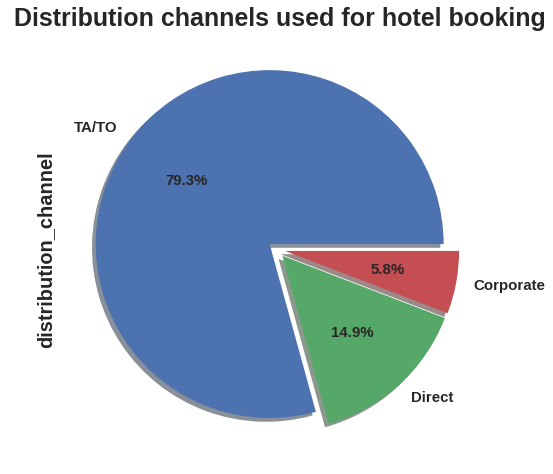

In [47]:
hoteldf['distribution_channel'].value_counts()[:3].plot.pie(explode=([0.05]*3),autopct='%1.1f%%',shadow=True,figsize=(10,8),fontsize=15)

plt.title(" Distribution channels used for hotel booking")

**Conclusion:** Online TA/TO(79.3%) is mostly used distribution channel for hotel booking then followed by Direct(14%).

**9.Which is the most preferred room type by the customers?**

In [48]:
hoteldf.assigned_room_type.value_counts()

A    46313
D    22432
E     7195
F     3627
G     2498
C     2165
B     1820
H      706
I      357
K      276
P        6
L        1
Name: assigned_room_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of guests')

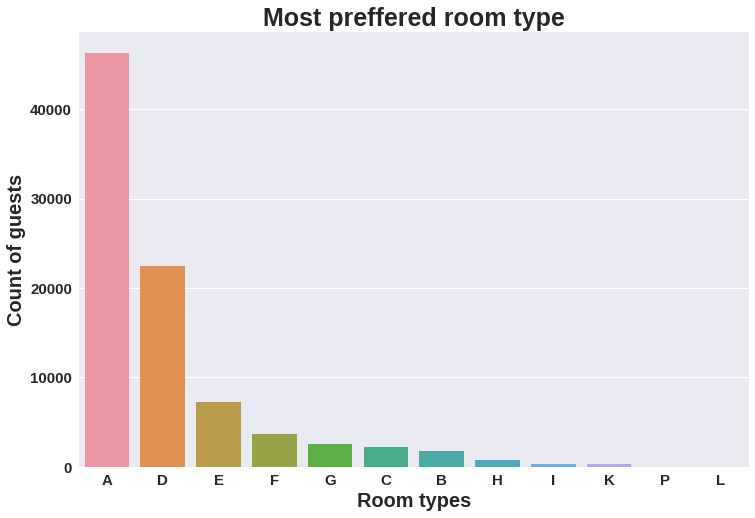

In [49]:
plt.figure(figsize=(12,8))
sns.countplot(hoteldf.assigned_room_type,order=hoteldf.assigned_room_type.value_counts().index)
plt.title('Most preffered room type')
plt.xlabel('Room types')
plt.ylabel('Count of guests')

**Conclusion:** So the most preferred Room type is "A", Second most preferred is D.

**10.Market segment on the basis of months?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Months')

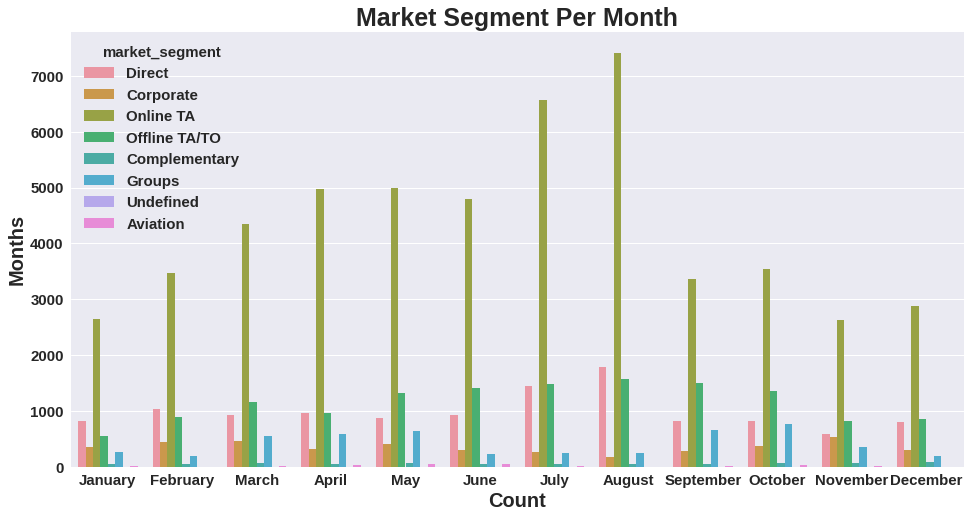

In [50]:
plt.figure(figsize=(16,8))
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
graph = sns.countplot('arrival_date_month', hue='market_segment', data=hoteldf, order=order)
plt.title('Market Segment Per Month')
plt.xlabel('Count')
plt.ylabel('Months')

**Conlcusion:** Graph shows different market segments across months, According to this graph in every month online TA segment effect the most.


**11.Which hotel has the highest adr?**



<Figure size 720x576 with 0 Axes>

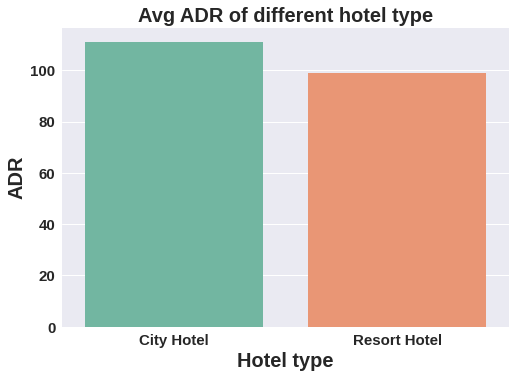

<Figure size 720x576 with 0 Axes>

In [51]:
highest_adr=hoteldf.groupby('hotel')['adr'].mean().reset_index()
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'],palette='Set2')
plt.title('Avg ADR of different hotel type',fontsize=20)
plt.xlabel('Hotel type')
plt.ylabel('ADR')

plt.figure(figsize=(10,8))


**Conclusion:** City hotel has the highest ADR.

**12.Which Market Segment has the higest cancellation rate?**

In [52]:
market_segmentsdf=hoteldf[hoteldf['is_canceled']==1].groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})
market_segmentsdf

,market_segment,hotel,counts
0,Aviation,City Hotel,45
1,Complementary,City Hotel,57
2,Complementary,Resort Hotel,31
3,Corporate,City Hotel,264
4,Corporate,Resort Hotel,246
5,Direct,City Hotel,912
6,Direct,Resort Hotel,825
7,Groups,City Hotel,890
8,Groups,Resort Hotel,445
9,Offline TA/TO,City Hotel,1261


Text(0.5, 1.0, 'market_segment & cancellation rate')

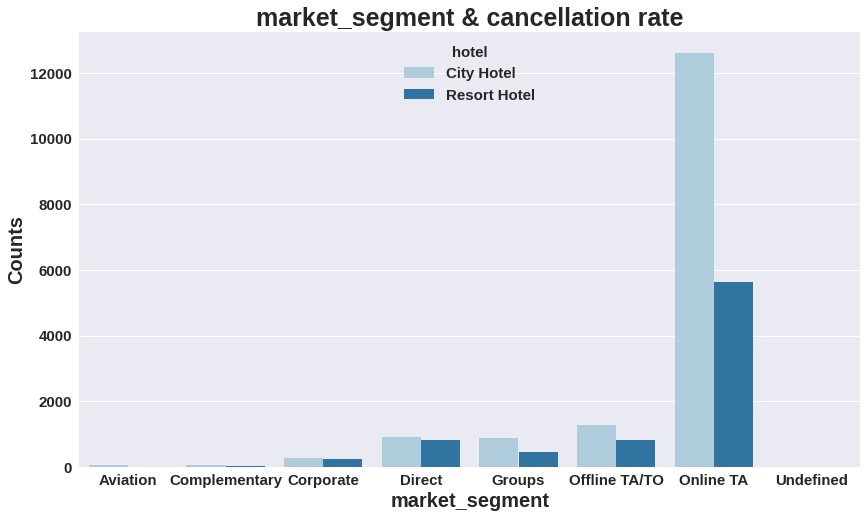

In [53]:
plt.figure(figsize=(14,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data=market_segmentsdf,palette='Paired')
plt.xlabel('market_segment')
plt.ylabel('Counts')
plt.title('market_segment & cancellation rate')

**Conclusion:** Online T/A(Travel agent) has the highest cancellation in both type of hotel



**13.Which type of food is most prefferable?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Preferred Meal Type')

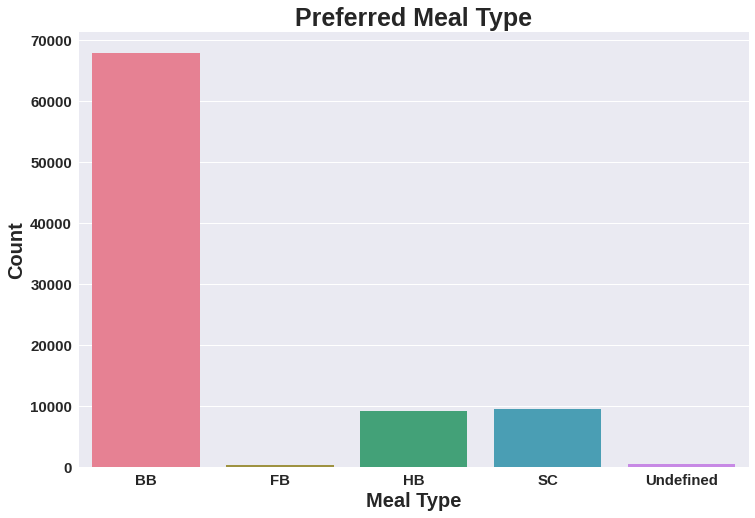

In [54]:
plt.figure(figsize=(12,8))
sns.countplot(hoteldf['meal'],palette='husl')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

**Conclusion:**The most preferred meal type by the guests is BB where HB and SC are equally preferred.

**14.Which hotel has longer waiting time?**

Text(0.5, 1.0, 'Waiting time for each hotel type')

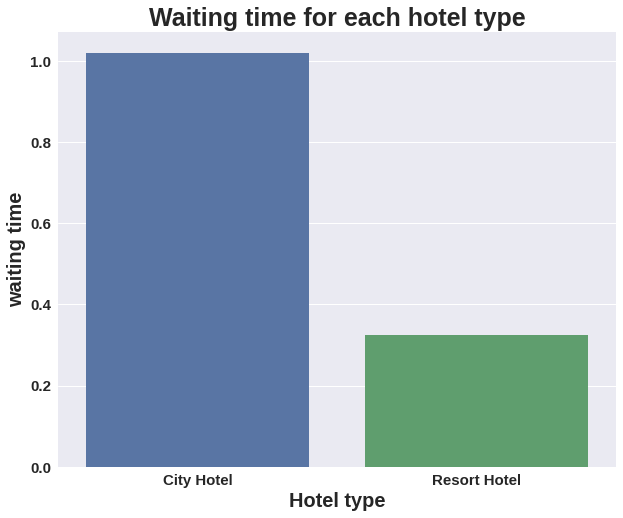

In [55]:
waiting_time_df=hoteldf.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(x=waiting_time_df['hotel'],y=waiting_time_df['days_in_waiting_list'])
plt.xlabel('Hotel type')
plt.ylabel('waiting time')
plt.title("Waiting time for each hotel type")

**Conclusion:**  City Hotels has longer waiting period than the Resort Hotel.

**15.What is adr across different months?**

In [56]:
bookings_by_months=hoteldf.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bookings_by_months['arrival_date_month']=pd.Categorical(bookings_by_months['arrival_date_month'],categories=order,ordered=True)
bookings_by_months=bookings_by_months.sort_values('arrival_date_month')
bookings_by_months

,arrival_date_month,hotel,adr
8,January,City Hotel,85.092612
9,January,Resort Hotel,49.131584
6,February,City Hotel,88.945304
7,February,Resort Hotel,54.081107
15,March,Resort Hotel,57.569213
14,March,City Hotel,94.763375
0,April,City Hotel,117.156250
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,127.851240


Text(0, 0.5, 'ADR')

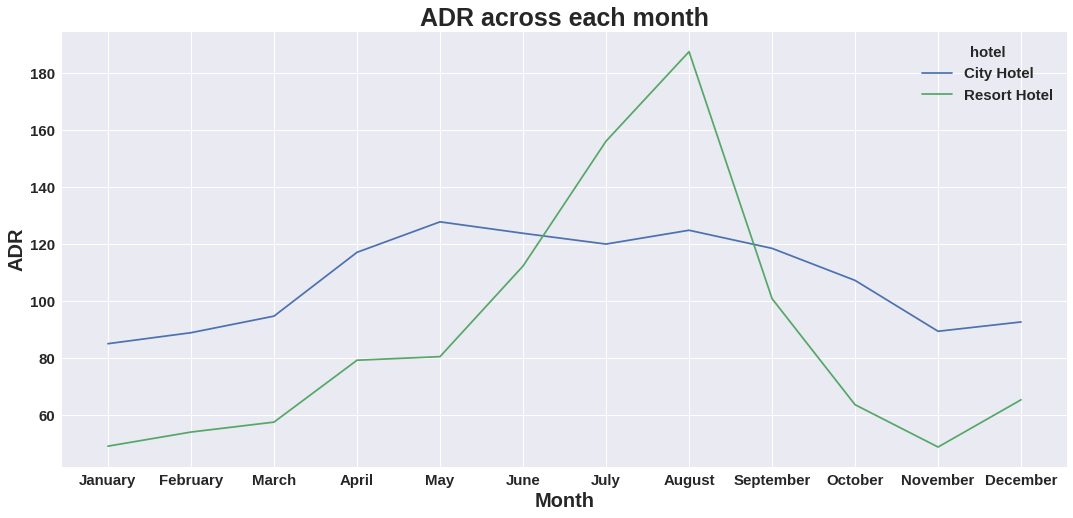

In [57]:
plt.figure(figsize=(18,8))
sns.lineplot(x=bookings_by_months['arrival_date_month'],y=bookings_by_months['adr'],hue=bookings_by_months['hotel'])
plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')

**Conclusion:**For Resort hotel is ADR is high only in the months June,July,August as compared to City Hotels, but in other months ADR of Resort hotel was less than the city hotels.

**16.Which distribution channel is more effective for increasing the income of hotel?**

In [58]:
distribution_channel_new=hoteldf.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()
distribution_channel_new

,distribution_channel,hotel,adr
0,Corporate,City Hotel,83.265884
1,Corporate,Resort Hotel,52.972522
2,Direct,City Hotel,112.092246
3,Direct,Resort Hotel,106.523946
4,GDS,City Hotel,120.317845
5,TA/TO,City Hotel,112.426347
6,TA/TO,Resort Hotel,101.553533
7,Undefined,City Hotel,29.625000
8,Undefined,Resort Hotel,112.700000


Text(0.5, 1.0, 'ADR across Distribution channel')

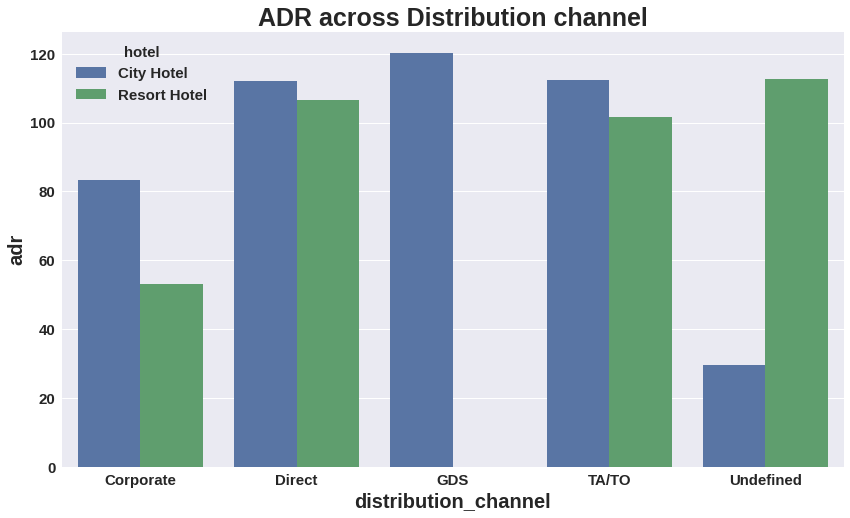

In [59]:
plt.figure(figsize=(14,8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_new, hue='hotel')
plt.title('ADR across Distribution channel')

**Conclusion:**Graph shows GDS is more effective in city hotels but it needs to improve in Resort hotel as well.TA/TO and Direct is almost equally contributed in both type of hotel for increasing their income.

**FINAL CONCLUSIONS SUMMERY:**

1.   City hotels are the most preferred hotel type by the guests.
2.The majority of guests come from portugal.
3.The hotel reservation tends to peak during July and August.
4.Most of the bookings for City hotels and Resort hotel were happened in 2016.
5.Only 3.9 % people were revisited the hotels. Rest 96.1 % were new guests. Thus retention rate is low.
6.Graph shows different market segments across months, According to this graph in every month online TA segment effects the most.
7.The most preferred Room type is "A".
8.91.6% guests do not required parking spaces only few guest needs parking(ie.8.3%).
9.Average ADR for city hotel is high as compared to resort hotels. These City hotels are generating more revenue than the resort hotels.
10.Online T/A(Travel agent) has the highest cancellation in both type of hotel.
11.BB( Bed & Breakfast) is the most preferred type of meal by the guests.
12.City hotel has highest number of booking cancelation than Resort hotel.
13.City Hotels has longer waiting period than the Resort Hotel.
14.For Resort hotel ADR is high only in the months June,July,August as compared to City Hotels, but in other months ADR of Resort hotel was less than the city hotels.
15.Graph shows GDS is more effective in city hotels but it needs to improve in Resort hotel as well.TA/TO and Direct is almost equally contributed in both type of hotel for increasing their income.






